# Matplotlib animations - Part II

For all of you who are beginners with Python, please read the first [part](01-prerequisites.ipynb) of the tutorial which is mandatory for understanding the concepts.

## 1. Basic introductions

In this part of the tutorial we want to focus on how we can create an animation with the usage of the matplotlib animation module. However, the module is under heavy development, so that the stability and usability of this code cannot be guaranteed. We also find some problems in the architecture of the animation structure which make the programming not easy. 

As an example we want to implement a simple *sinusodial function* $f(x,t) = \sin(x+t)$ in which we use the time as an phase shift. The result will look like this:

<video controls src="figs/mymovie.mp4" /> 

## 2. Create an animation within 4 steps

Basically we can create an animation within 4 steps:
 1. Create an initial figure
 2. Define an init function
 3. Define an animate function
 4. Setup the animation and run it
 
In this tutorial we will describe each step in the following sections. For an easy implementation you can define for each step an individual notebook cell, but of course, you can write the whole animation in one single program cell. 

Before we start, we strongly recomment to watch the videos about the usage of matplotlib, especially the usage of the fig, ax - part!

### 2.1. Create the inital figure

Before we can start thinking about the animation itself we have to think of how we want to display the data. This means that we need to know in the beginning how the figure should look like. The figure of the animation is the part which should not change for the whole animation since we want to present changing data. It makes no sense, to change the plot style during the video from a line plot to a scatter or bar plot. However, one can think of changing the color of a line plot, but is something we don't handle in this tutorial. As said we want to create an animation of the sine function for which we want to use the line plot style. 

The first cell (or part)  of the animation is always the creation of the initial figure:

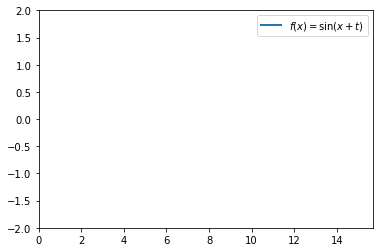

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# these modules are necessary for the animation
from matplotlib import animation
from IPython.display import HTML

# create a starting figure
fig, ax = plt.subplots()

ax.set_xlim(( 0, 5*np.pi))
ax.set_ylim((-2, 2))

im_animation, = ax.plot([], [], lw=2, label=r'$f(x)=\sin(x+t)$')

ax.legend()

After defining the initial import of all necessary modules, we define a new figure with *plt.subplots*. This functions as described in the other video tutorials returns  two variables, one is a reference to the figure itself *fig* and the second variable *ax* is a reference to the plot and its parameters. The next commands sets the limits for the $x$- and $y$- axis of the plot. We have chosen here the interval $[0,5\pi]$ for the $x$ axis and $[-2,2]$ for the $y$ axis.

### 2.2. Defining the init function

In [8]:
x = np.linspace(0,10*np.pi, 500)

def init():
    im_animation.set_data(x, np.sin(x))
    
    return [im_animation]

### 2.3. Defining the animate function

In [9]:
def animate(frame):
    im_animation.set_data(x, np.sin(x+frame))
    return [im_animation]

### 2.4. Setup and run the animation

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               #fargs=(50,),
                               blit=True)

HTML(anim.to_jshtml())

The jupyter notebook is creating an animation widget which you can use to look at the calculated video. The followign figure briefly explains, what you can do with this video widget:

<img src="figs/video_controls.png" style="width: 50%;" />

Directly below the graph you have the time bar, in which you can see the position of inside the video. You can use the blue pointer to jump directly to another position as you can do in every other video player. The next line of buttons control the video player. We have controls to play the movie forward or backward. The important buttons can be used as follows:

 * <i class="fa fa-fast-backward"></i>  jump to the beginning of the video
 * <i class="fa fa-step-backward"></i>  one frame backwards
 * <i>&#9668;</i> play backwards
 * <i class="fa fa-pause"></i> pause the video
 * <i>&#9658;</i> play forward
 * <i class="fa fa-step-forward"></i> one frame forward
 * <i class="fa fa-fast-forward"></i> jump to the end of the video
(Double click on the play button doesn't stop the video, you have to use the pause button instead!)

The lower buttons control th loop behaviour. The default is **Loop** which plays the video for ever. **Once** is playing the video only once and **Reflect** plays the video forward until the end and the backward to the beginning and then forward ... !


### 2.5. Optimazations and customizations

In [11]:
def animate_args(frame, speed):
    im_animation.set_data(x, np.sin(x+frame*speed/100.))
    return [im_animation]

anim = animation.FuncAnimation(fig, animate_args, init_func=init,
                               frames=100, interval=20, 
                               fargs=(10,),
                               blit=True)

HTML(anim.to_jshtml())

### 2.6. Saving the animation

In [12]:
anim.save('mymovie.mp4')